# Titanic Project

Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 
Note: You can find the dataset in the link below.
Downlaod Files:
https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv

In [1]:
# importing required initial libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading csv file
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


"Survived" is the target column based on the problem statement

In [3]:
df.info()   # Check df information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.dtypes # check df data types

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Observations: 
1. 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked' are categorical columns however 'PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch' data type is integer based on the discrete numbers in these columns 
2. Data types for 'Age' and 'Fare' are correct as they contain continuous data

In [5]:
df.columns # checking columns names

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.shape  # checking the size of the dataset

(891, 12)

# Duplicate Values Check & Handling

In [7]:
# Check for duplicate values in the dataframe

In [8]:
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Observations: No duplicate values present in the dataframe

# Null Values Handling

In [9]:
df.isnull(). sum()  # Checking the sum of null values for all columns

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Observations:
1. Null values present in 'Age', 'Cabin' and 'Embarked' columns
2. 'Age' --> Continuous data. I will use 'median' to replace null values
3. 'Cabin' and 'Embarked' --> Categorical data. I will use first value of 'mode' to replace null values

In [10]:
# Filling null values of column with continuous data with 'median'
df["Age"]=df["Age"].fillna((df["Age"].median()))

In [11]:
df["Age"].isnull().sum() # checking the null values in "Age" column

0

In [12]:
# Filling null values of column with categorical data with first value of 'mode'
df['Cabin']=df['Cabin'].fillna((df['Cabin'].mode()[0]))

In [13]:
df['Cabin'].isnull().sum() # checking the null values in "Cabin" column

0

In [14]:
# Filling null values of column with categorical data with first value of 'mode'
df['Embarked']=df['Embarked'].fillna((df['Embarked'].mode()[0]))

In [15]:
df['Embarked'].isnull().sum() # checking the null values in "Cabin" column

0

In [16]:
df.isnull(). sum()  # Checking the sum of null values for all columns

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Observations: No null values present in dataset now

In [17]:
df.shape

(891, 12)

# Segregating columns based on data type for better EDA

In [18]:
# Dataframe of columns with Nominal Categorical Data
df_categorical_nominal=df[['Pclass','Sex','SibSp', 'Parch','Embarked']].copy()

In [19]:
df_categorical_nominal.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [20]:
# Dataframe of columns with Ordinal Categorical Data
df_categorical_ordinal=df[['PassengerId','Name','Ticket', 'Cabin']].copy()

In [21]:
df_categorical_ordinal.columns

Index(['PassengerId', 'Name', 'Ticket', 'Cabin'], dtype='object')

In [22]:
# Dataframe of columns with Continuous Data
df_continuous=df[['Age','Fare']].copy()

In [23]:
df_continuous.columns

Index(['Age', 'Fare'], dtype='object')

In [24]:
# Dataframe of column with Target Data
df_target=df["Survived"].copy()

# Statistical Summary

In [25]:
# Statistical summary for continuous data
df_continuous.describe()

,Age,Fare
count,891.000000,891.000000
mean,29.361582,32.204208
std,13.019697,49.693429
min,0.420000,0.000000
25%,22.000000,7.910400
50%,28.000000,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


Observations:
1. Count: Same for "Age" and "Fare". Hence no null values present
2. Mean > Median for columns (Rightly skewed): "Age" and "Fare"
3. More difference between 75 percentile and max for columns: "Age" and "Fare". Hene outliers are present
4. Standard deviation is high for both columns "Age" and "Fare", hence data spread is high

In [26]:
# Statistical summary for nominal categorical data
df_categorical_nominal.describe(include="O")

,Sex,Embarked
count,891,891
unique,2,3
top,male,S
freq,577,646


Observations:
1. count is same for all columns hence no null values present
2. Unique values present in columns: Sex --> 2, Embarked -->3
3. Mode of columns: Sex --> male, Embarked -->S
4. Frequency of mode value of columns: Sex --> 577, Embarked -->646

In [27]:
# Statistical summary for ordinal categorical data
df_categorical_ordinal.describe(include="O")

,Name,Ticket,Cabin
count,891,891,891
unique,891,681,147
top,"Braund, Mr. Owen Harris",347082,B96 B98
freq,1,7,691


Observations:
1. Count is same for all columns hence no null values present
2. Unique values present in columns: Ticket --> 681, Cabin-->147
3. Mode of columns: Ticket --> 347082, Cabin -->B96 B98
4. Frequency of mode value of columns: Ticket -->7, Cabin -->691

# Visualization of data

For the nominal categorical data, we use countplot as it will give frequency of the classes of columns

In [28]:
df_categorical_nominal.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')

3    491
1    216
2    184
Name: Pclass, dtype: int64


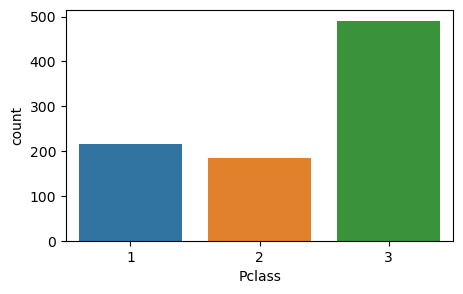

In [29]:
print(df_categorical_nominal["Pclass"].value_counts())
plt.figure(figsize=(5,3))
sns.countplot(df_categorical_nominal["Pclass"])
plt.show()

Observations: 
"Pclass": Total no. of "1" classes are 216, total no. of "2" classes are 184 and the totla no. of "3" classes are 491

male      577
female    314
Name: Sex, dtype: int64


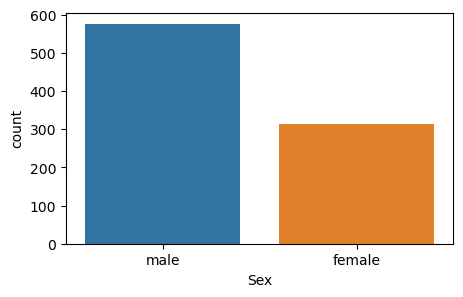

In [30]:
print(df_categorical_nominal["Sex"].value_counts())
plt.figure(figsize=(5,3))
sns.countplot(df_categorical_nominal["Sex"])
plt.show()

Observations: 
"Sex": Total no. of "male" classes are 577 and the totla no. of "female" classes are 314

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


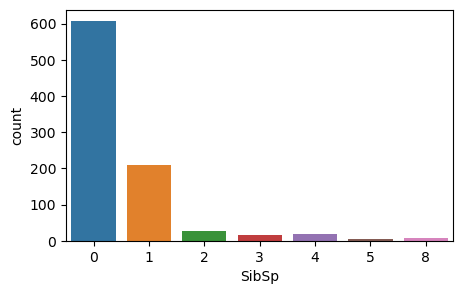

In [31]:
print(df_categorical_nominal["SibSp"].value_counts())
plt.figure(figsize=(5,3))
sns.countplot(df_categorical_nominal["SibSp"])
plt.show()

Observations: 
"SibSp" classes count:
0-->608,
1-->209,
2-->28,
4-->18,
3-->16,
8-->7,
5-->5

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


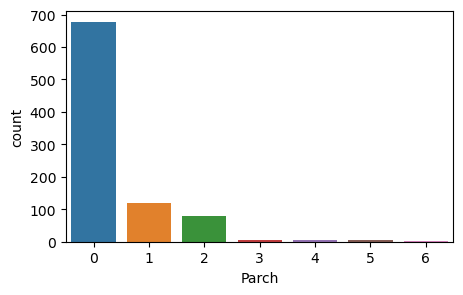

In [32]:
print(df_categorical_nominal["Parch"].value_counts())
plt.figure(figsize=(5,3))
sns.countplot(df_categorical_nominal["Parch"])
plt.show()

Observations: 
"Parch" classes count:
0-->678,
1-->118,
2-->80,
5-->5,
3-->5,
4-->4,
6-->1

S    646
C    168
Q     77
Name: Embarked, dtype: int64


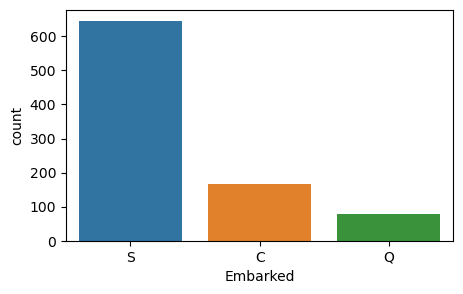

In [33]:
print(df_categorical_nominal["Embarked"].value_counts())
plt.figure(figsize=(5,3))
sns.countplot(df_categorical_nominal["Embarked"])
plt.show()

Observations: 
"Embarked" classes count:
S-->646,
C-->168,
Q-->77

<AxesSubplot:xlabel='Survived', ylabel='count'>

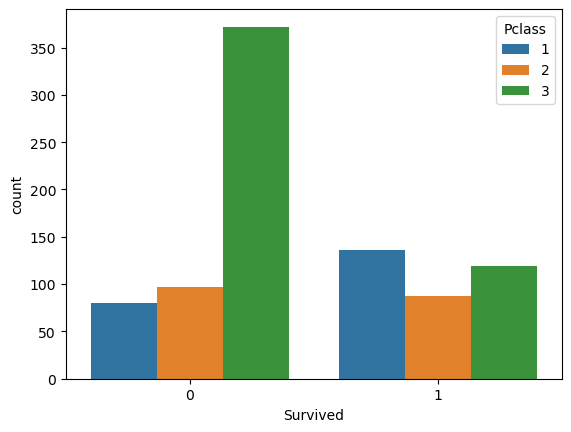

In [34]:
sns.countplot(x="Survived",hue = "Pclass",data = df)

Observations: (0 mean no survival, 1 means survived) -->
1. Class 3 has less survival rate compared to Class 1 & 2
2. Class 1 has more survival rate compared to Class 2 & 3
3. More no. of Class 3 people compared to other classes

<Figure size 500x300 with 0 Axes>

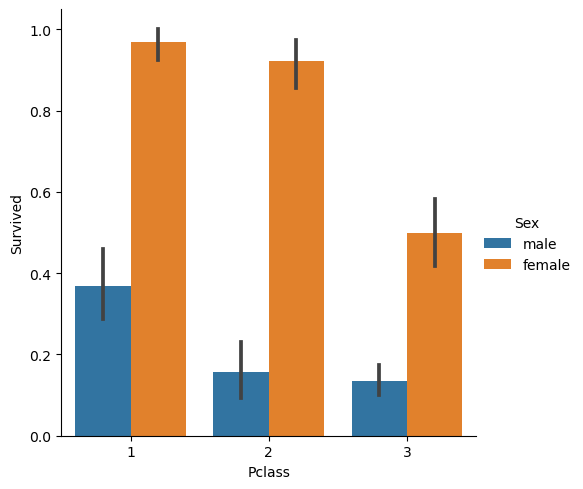

In [35]:
plt.figure(figsize=(5,3))
sns.catplot(x="Pclass",y="Survived",hue="Sex",data = df,kind="bar")
plt.show()

Observations: 
1. Female survival rate is more compared to male survival rate in all the classes
2. In 1st Pclass, majority of females are survived
3. In 3rd Pclass, male survival rate is very less

<AxesSubplot:xlabel='Survived', ylabel='count'>

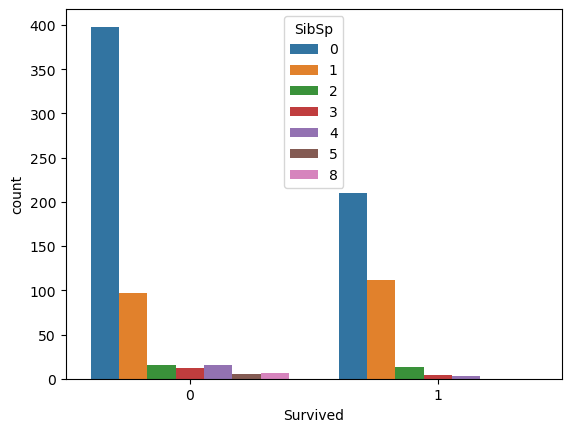

In [36]:
sns.countplot(x="Survived",hue = "SibSp",data = df)

Observations: (0 mean no survival, 1 means survived) -->
Most of the people belongs to Class 0 hence Class 0 shows less survival rate as well as high survival rate compared to
other classes

<Figure size 500x300 with 0 Axes>

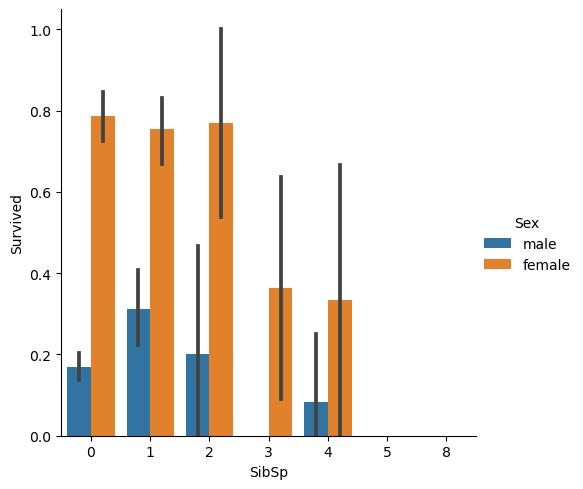

In [37]:
plt.figure(figsize=(5,3))
sns.catplot(x="SibSp",y="Survived",hue="Sex",data = df,kind="bar")
plt.show()

Observations: 
1. Female survival rate is more compared to male survival rate in all the classes
2. In Class 0, majority of the females are survived
3. In Class 4, male survival rate is very less

<Figure size 500x300 with 0 Axes>

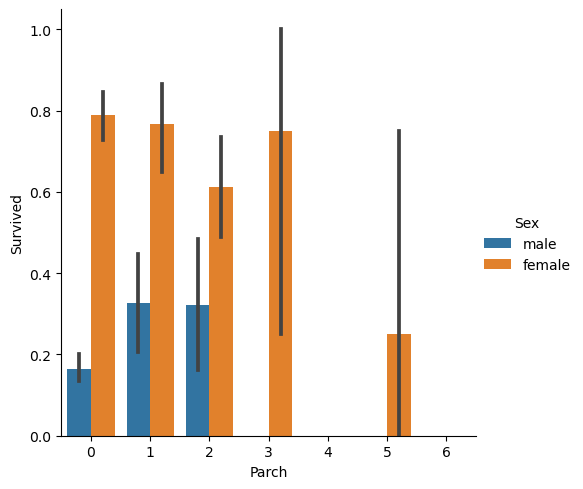

In [38]:
plt.figure(figsize=(5,3))
sns.catplot(x="Parch",y="Survived",hue="Sex",data = df,kind="bar")
plt.show()

Observations: 
1. Female survival rate is more compared to male survival rate in all the classes
2. In Class 0, majority of the females are survived
3. In Class 0, male's survival rate is less compared to Classes 1 & 2
4. No survival for males from Classes 3 to 5

<Figure size 500x300 with 0 Axes>

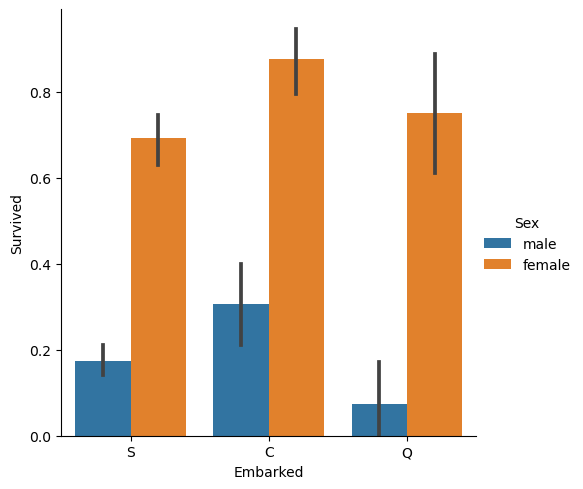

In [39]:
plt.figure(figsize=(5,3))
sns.catplot(x="Embarked",y="Survived",hue="Sex",data = df,kind="bar")
plt.show()

Observations: 
1. Female survival rate is more compared to male survival rate in all the classes
2. Class Q has less male's survival rate

In [40]:
df_categorical_ordinal.columns

Index(['PassengerId', 'Name', 'Ticket', 'Cabin'], dtype='object')

In [41]:
# Visualization of Continuous data
df_continuous.columns

Index(['Age', 'Fare'], dtype='object')

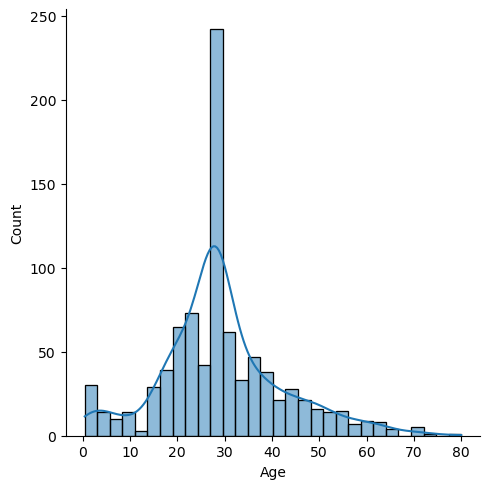

In [42]:
sns.displot(data=df,kde=True,x="Age")
plt.show()

The data of the column is not normalized and right skewed. The building blocks is out of the normalized curve.

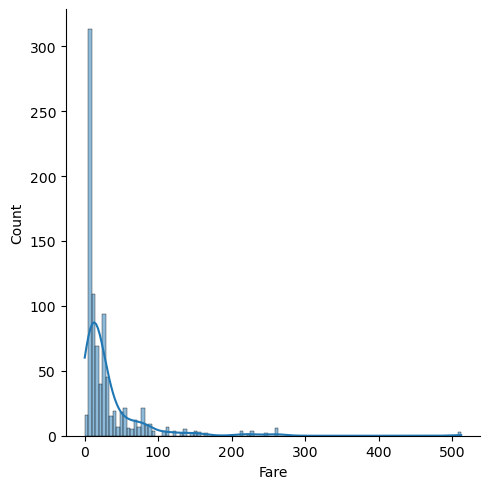

In [43]:
sns.displot(data=df,kde=True,x="Fare")
plt.show()

The data of the column is not normalized and right skewed. The building blocks is out of the normalized curve.

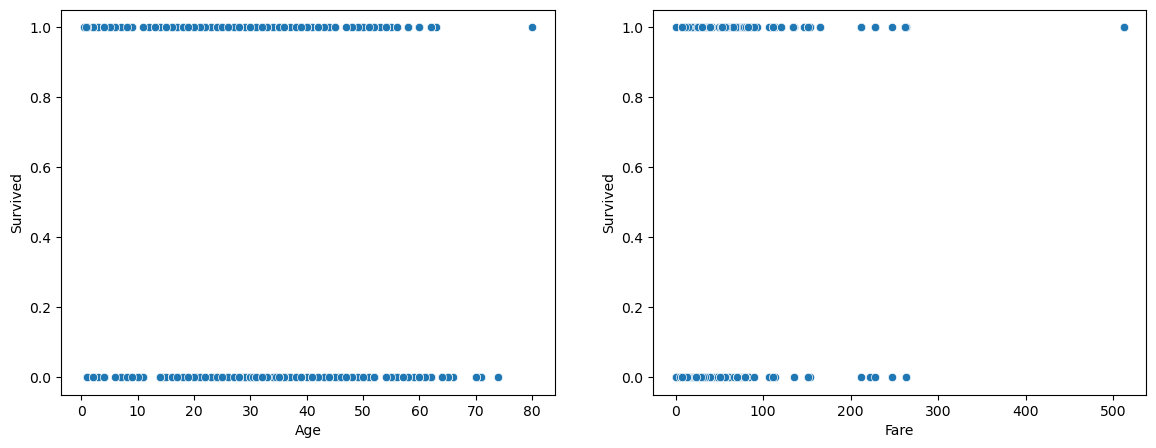

In [44]:
features = ['Age','Fare']
plt.subplots(figsize=(14,5))
for i ,col in enumerate(features):
    plt.subplot(1,2,i+1)
    sns.scatterplot(data=df,x=col,y='Survived')
plt.show()

Observations:
1. 'Age': We can see that Age is equally distributed in the range of 0 to 65
2. 'Fare': We can see that Age is equally distributed in the range of 0 to 260

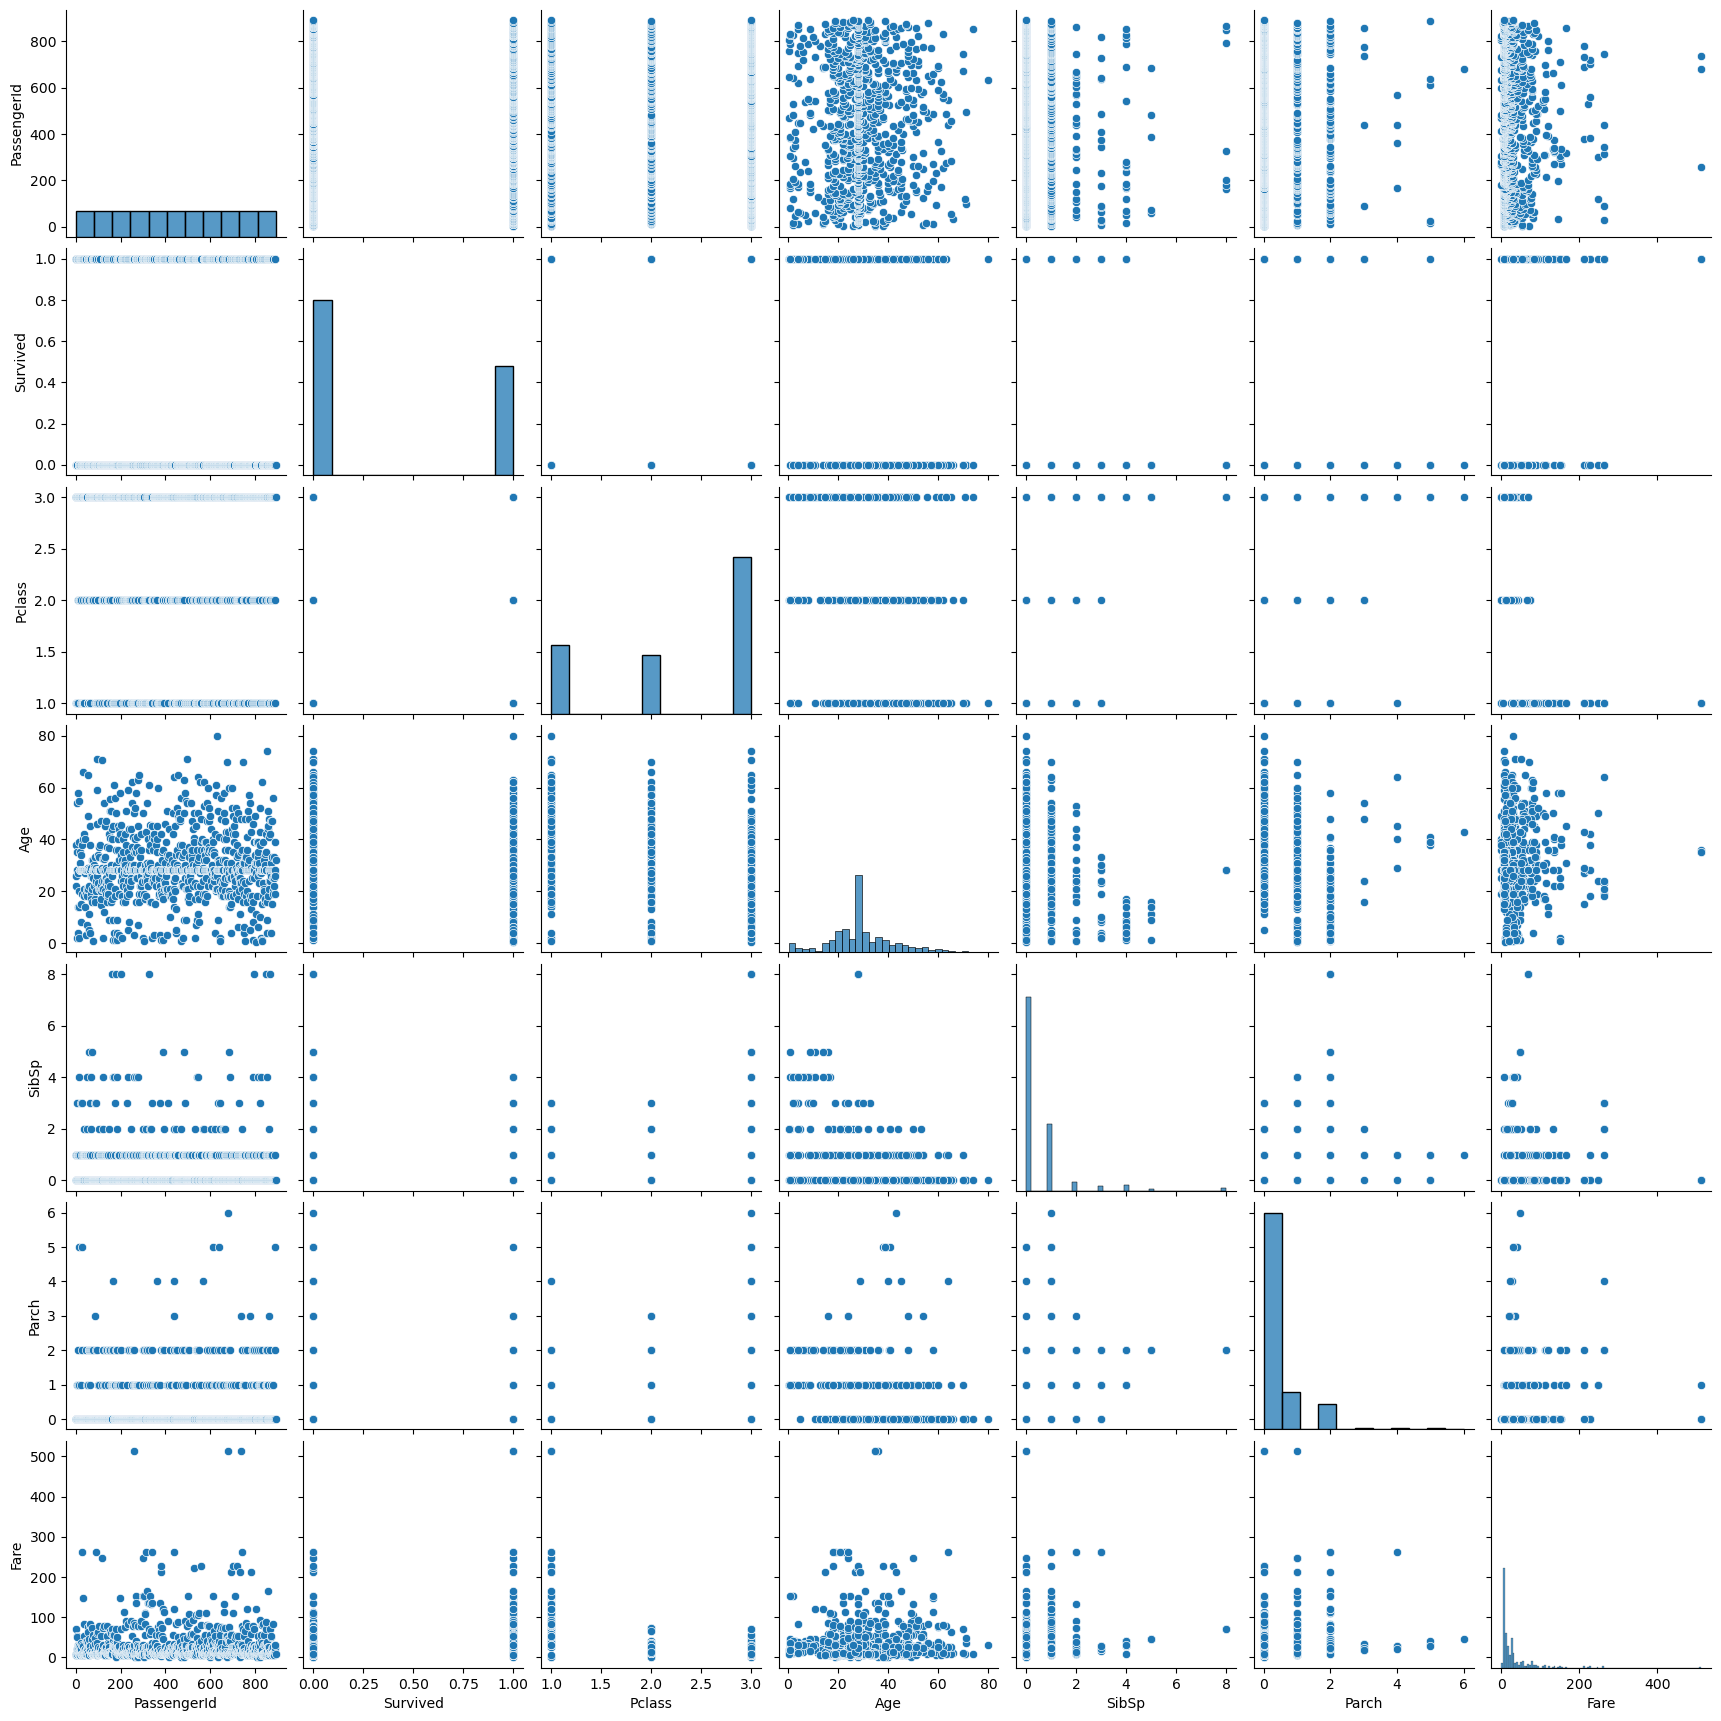

In [45]:
sns.pairplot(df)

Observations:
    Based on the more density distribution of 'Age' Vs 'Fare' data lies flat, majorly both "Age" and "Fare" are almost having flat linear relation

0    549
1    342
Name: Survived, dtype: int64


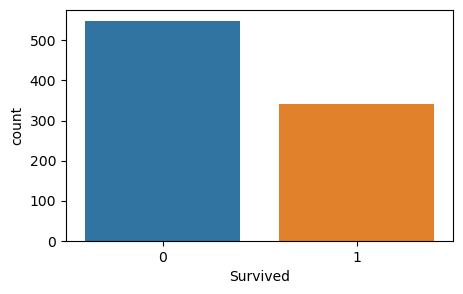

In [46]:
# Visualization of Target Variable
plt.figure(figsize=(5,3))
print(df["Survived"].value_counts())
sns.countplot(df["Survived"])
plt.show()

Observations: 
1. Total no. of "Survived" class 0 are 549 and the totla no. of "Survived" class 1 are 342. Classes are imbalanced


Visualization part is completed

# Encoding of Categorical Data

Using Ordinal Encoder to encode the data

In [47]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [48]:
# Encoding needed for columns "Name", "Sex", "Ticket", "Cabin" and "Embarked" to change string data to numerical format
df_encode=df[["Name", "Sex", "Ticket", "Cabin", "Embarked"]].copy()
df_encode.head(5)

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,B96 B98,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,B96 B98,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,B96 B98,S


In [49]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()  # creating instance for OrdinalEncoder

In [50]:
for i in df_encode.columns:
    df_encode[i]=enc.fit_transform(df_encode[i].values.reshape(-1,1))  # Transforming the data using OrdingalEncoder
df_encode.head(10)

,Name,Sex,Ticket,Cabin,Embarked
0,108.0,1.0,523.0,47.0,2.0
1,190.0,0.0,596.0,81.0,0.0
2,353.0,0.0,669.0,47.0,2.0
3,272.0,0.0,49.0,55.0,2.0
4,15.0,1.0,472.0,47.0,2.0
5,554.0,1.0,275.0,47.0,1.0
6,515.0,1.0,85.0,129.0,2.0
7,624.0,1.0,395.0,47.0,2.0
8,412.0,0.0,344.0,47.0,2.0
9,576.0,0.0,132.0,47.0,0.0


In [51]:
# Dropping columns "Name", "Sex", "Ticket", "Cabin" and "Embarked" from original dataframe
df.drop(["Name", "Sex", "Ticket", "Cabin", "Embarked"],axis=1,inplace=True)
df.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [52]:
# Adding encoded columns to the original dataframe
df_n=pd.concat([df,df_encode],axis=1)
df_n.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Cabin,Embarked
0,1,0,3,22.0,1,0,7.2500,108.0,1.0,523.0,47.0,2.0
1,2,1,1,38.0,1,0,71.2833,190.0,0.0,596.0,81.0,0.0
2,3,1,3,26.0,0,0,7.9250,353.0,0.0,669.0,47.0,2.0
3,4,1,1,35.0,1,0,53.1000,272.0,0.0,49.0,55.0,2.0
4,5,0,3,35.0,0,0,8.0500,15.0,1.0,472.0,47.0,2.0


In [53]:
df=df_n
df.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Cabin,Embarked
0,1,0,3,22.0,1,0,7.2500,108.0,1.0,523.0,47.0,2.0
1,2,1,1,38.0,1,0,71.2833,190.0,0.0,596.0,81.0,0.0
2,3,1,3,26.0,0,0,7.9250,353.0,0.0,669.0,47.0,2.0
3,4,1,1,35.0,1,0,53.1000,272.0,0.0,49.0,55.0,2.0
4,5,0,3,35.0,0,0,8.0500,15.0,1.0,472.0,47.0,2.0


# Checking coefficients of correlation (r)

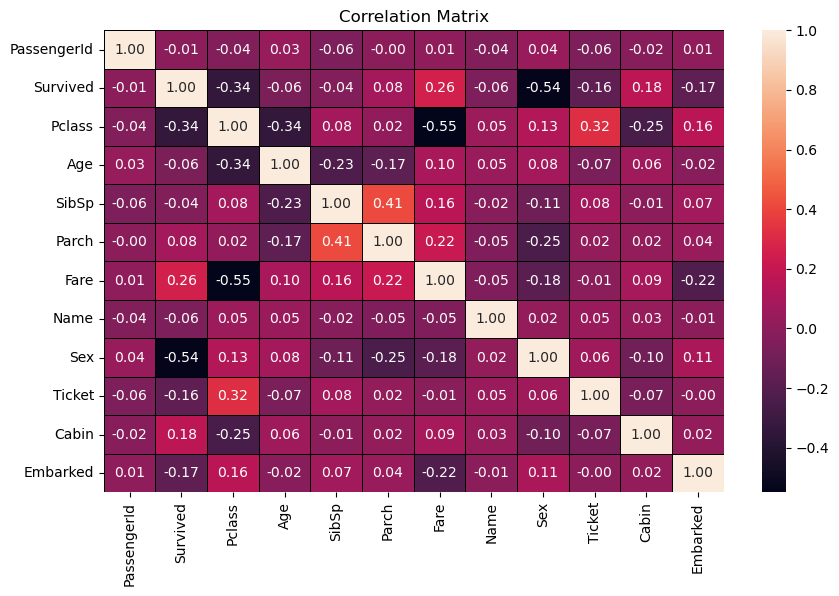

In [54]:
# Checking correlaiton coefficients to know the strength of relationship between variables
corr_r=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_r,annot=True,linewidths=0.5,linecolor='black',fmt=".2f")
plt.title("Correlation Matrix")
plt.savefig("correlation_matrix.jpg")
plt.show()

In [55]:
corr_r["Survived"].sort_values(ascending=False)  # Arranging the relationship of target variable with other variables in descending order

Survived       1.000000
Fare           0.257307
Cabin          0.175690
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Name          -0.057343
Age           -0.064910
Ticket        -0.164549
Embarked      -0.167675
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64

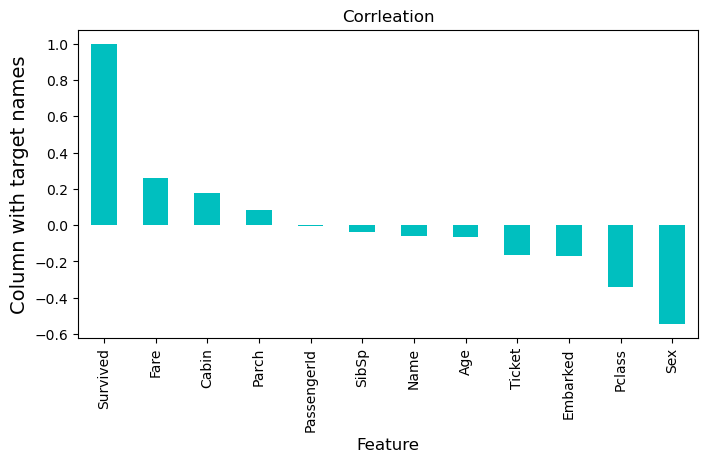

In [56]:
# Plotting the relationship of target variable with other variables in descending order
plt.figure(figsize=(8,4))
corr_r["Survived"].sort_values(ascending=False).plot(kind="bar",color="c")
plt.xlabel("Feature",fontsize=12)
plt.ylabel("Column with target names",fontsize=14)
plt.title("Corrleation",fontsize=12)
plt.show()

Observations: (Correlation of Target variable with features)
1. Max correlation: "Sex"
2. Min correlation: "PassengerId"
3. "PassengerId" has almost zero correlation hence will drop this column.
4. Typically -0.3 to +0.3 are considered as weak correlation however there are many columns having the relationship in this range with target variable hence removing only "PassengerId" with almost zero correlation based on correlation table 
5. I will check top 10 features that have strong relationship with target variable using SelectKBest algorithm and will take a call to remove further columns based on the comparison between corrleation table scores Vs SelectKBest scores

In [57]:
# Dropping "PassengerId" columns from the dataframe
df.drop(["PassengerId"],axis=1,inplace=True)
df.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Cabin,Embarked
0,0,3,22.0,1,0,7.2500,108.0,1.0,523.0,47.0,2.0
1,1,1,38.0,1,0,71.2833,190.0,0.0,596.0,81.0,0.0
2,1,3,26.0,0,0,7.9250,353.0,0.0,669.0,47.0,2.0
3,1,1,35.0,1,0,53.1000,272.0,0.0,49.0,55.0,2.0
4,0,3,35.0,0,0,8.0500,15.0,1.0,472.0,47.0,2.0


# Checking top 10 features using SelectKBest algorithm

In [58]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


X=df.drop("Survived",axis=1)  # #independent columns
y=df["Survived"]  # Output variable

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

      Specs        Score
4      Fare  4518.319091
7    Ticket  2871.655466
5      Name   435.568915
8     Cabin   284.482789
6       Sex    92.702447
0    Pclass    30.873699
1       Age    21.649163
9  Embarked    10.202525
3     Parch    10.097499
2     SibSp     2.581865


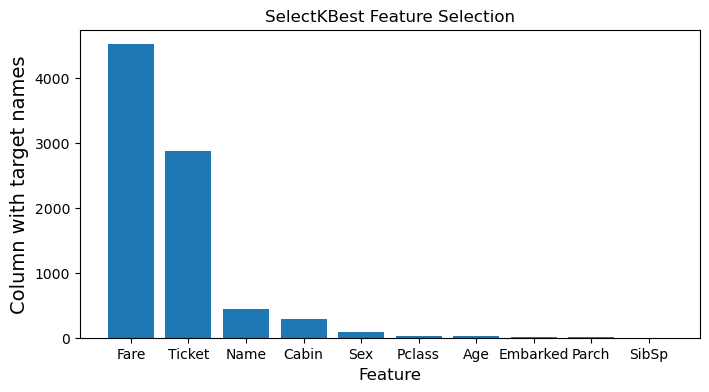

In [162]:
# Plotting the score values in descending order
df_sorted_desc= featureScores.sort_values('Score',ascending=False)
plt.figure(figsize=(8,4))
plt.bar('Specs','Score',data=df_sorted_desc)
plt.xlabel("Feature",fontsize=12)
plt.ylabel("Column with target names",fontsize=14)
plt.title("SelectKBest Feature Selection",fontsize=12)
plt.show()

Observations: 
1. "SibSp" has lower selectKBest score and also it has very weak correlation score of "-0.035322", hence dropping the column "SibSp" from the dataset

In [59]:
# Dropping "SibSp" columns from the dataframe
df.drop(["SibSp"],axis=1,inplace=True)
df.head(5)

,Survived,Pclass,Age,Parch,Fare,Name,Sex,Ticket,Cabin,Embarked
0,0,3,22.0,0,7.2500,108.0,1.0,523.0,47.0,2.0
1,1,1,38.0,0,71.2833,190.0,0.0,596.0,81.0,0.0
2,1,3,26.0,0,7.9250,353.0,0.0,669.0,47.0,2.0
3,1,1,35.0,0,53.1000,272.0,0.0,49.0,55.0,2.0
4,0,3,35.0,0,8.0500,15.0,1.0,472.0,47.0,2.0


# Checking multi-Collinearity using VIF

In [60]:
# We don't apply VIF on categorical data hence checking on continuous data

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_continuous[list(df_continuous.columns)]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
0,1.391179,Age
1,1.391179,Fare


Observations: 
1. Typically we remove columns with VIF values > 5. Here VIF factor < 5, hence there is no multi-collinearity between X features with continuous data, hence not removing any columns based on VIF score

# Pre-Processing

In [61]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'Parch', 'Fare', 'Name', 'Sex', 'Ticket',
       'Cabin', 'Embarked'],
      dtype='object')

In [62]:
# Segregating only X data
x=df.drop("Survived",axis=1)

In [63]:
x.head(5)

,Pclass,Age,Parch,Fare,Name,Sex,Ticket,Cabin,Embarked
0,3,22.0,0,7.2500,108.0,1.0,523.0,47.0,2.0
1,1,38.0,0,71.2833,190.0,0.0,596.0,81.0,0.0
2,3,26.0,0,7.9250,353.0,0.0,669.0,47.0,2.0
3,1,35.0,0,53.1000,272.0,0.0,49.0,55.0,2.0
4,3,35.0,0,8.0500,15.0,1.0,472.0,47.0,2.0


In [64]:
# Segregating only Y data
y=df["Survived"]
y.head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Checking Outliers

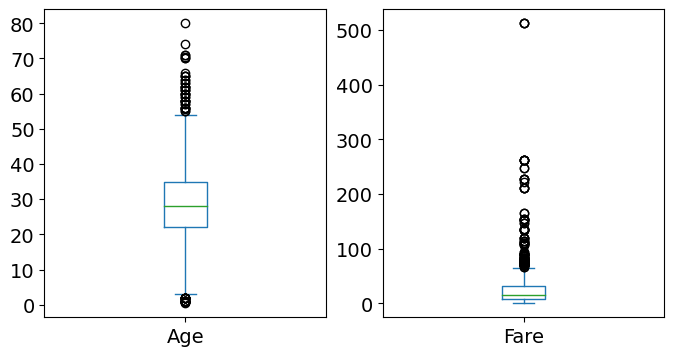

In [65]:
# We don't remove outliers of categorical X columns and in target variable, hence checking outliers for continuous X features
df_continuous.plot(kind="box",subplots=True,layout=(1,2),fontsize=14,figsize=(8,4))
plt.show()

Observations:
    Both variables "Age" and "Fare" have more outliers

# Removing Outliers using z-score method

In [66]:
# We don't remove outliers of categorical X columns and in target variable, hence removing outliers for continuous X features

In [67]:
df_continuous.columns

Index(['Age', 'Fare'], dtype='object')

In [68]:
df_continuous.shape

(891, 2)

In [69]:
df.shape

(891, 10)

In [70]:
x.shape

(891, 9)

In [71]:
y.shape

(891,)

In [72]:
# Calculating z score & identifying the rows and columns where absolute z score > 3
from scipy.stats import zscore
z=np.abs(zscore(df_continuous))
threshold=3
np.where(z>3)

(array([ 27,  88,  96, 116, 118, 258, 299, 311, 341, 377, 380, 438, 493,
        527, 557, 630, 672, 679, 689, 700, 716, 730, 737, 742, 745, 779,
        851], dtype=int64),
 array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 0], dtype=int64))

In [73]:
# Removing the rows in both x and y where the outliers are present in x features with continuous data
df_cont_n=df_continuous[(z<3).all(axis=1)]
x_new1=x[(z<3).all(axis=1)]
y_new1=y[(z<3).all(axis=1)]

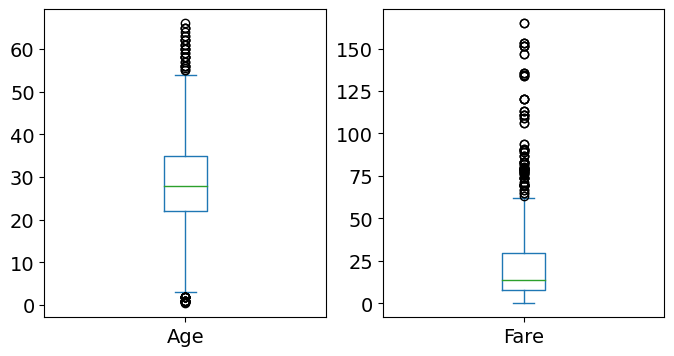

In [74]:
# Plotting features to check for outliers removal
df_cont_n.plot(kind="box",subplots=True,layout=(1,2),fontsize=14,figsize=(8,4))
plt.show()

Observations:
1. Plots "Age" and "Fare" shows that outliers are removed

In [75]:
x_new1.shape

(864, 9)

In [76]:
y_new1.shape

(864,)

In [77]:
# Data loss calculation with z-score method
loss_percent_zscore=round((x.shape[0]-x_new1.shape[0])/x.shape[0]*100,1)
loss_percent_zscore

3.0

Observations:
1. Data loss with z-score method is 3%. Now I will check the dataloss using IQR method as well and will take a call accordingly

# Removing Outliers using IQR method

In [78]:
# Calculate interquartile range (IQR) for x continuous data
Q1=df_continuous.quantile(0.25)
Q3=df_continuous.quantile(0.75)
IQR=Q3-Q1

# Dataframe with continuous X data after removing outliers
df_continuous_upd = df_continuous[((df_continuous>=(Q1-1.5*IQR)) & (df_continuous<=(Q3+1.5*IQR))).all(axis=1)]

# Removing the rows in both x and y where the outliers are present in x features with continuous data
x_new2 = x[((df_continuous>=(Q1-1.5*IQR)) & (df_continuous<=(Q3+1.5*IQR))).all(axis=1)]
y_new2 = y[((df_continuous>=(Q1-1.5*IQR)) & (df_continuous<=(Q3+1.5*IQR))).all(axis=1)]

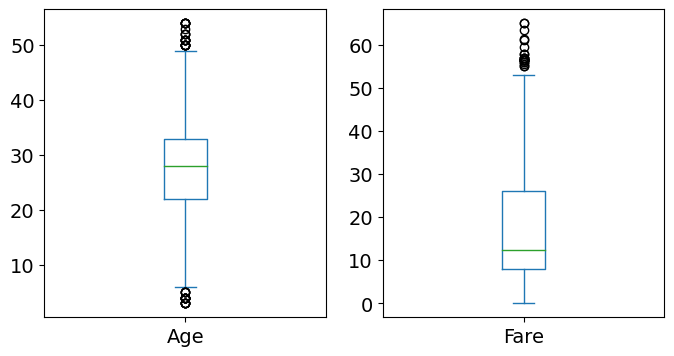

In [79]:
# Plotting features to check for outliers removal
df_continuous_upd.plot(kind="box",subplots=True,layout=(1,2),fontsize=14,figsize=(8,4))
plt.show()

Observations:
1. Plots "Age" and "Fare" shows that outliers are removed

In [80]:
x_new2.shape

(721, 9)

In [81]:
y_new2.shape

(721,)

In [82]:
# Data Loss Calculation with IQR
loss_percent_IQR=round((x.shape[0]-x_new2.shape[0])/x.shape[0]*100,1)
display(loss_percent_IQR)

19.1

Observations: 
1. Data loss with IQR is 19.1% which is higher than data loss with z-score (3%), hence considering x & y data after removing outliers using zscore method for model building

In [83]:
x=x_new1
y=y_new1

# Skewness Check

In [84]:
# We don't remove skewness from categorical X data and from target variable hence checking skewness on X features with continuous data 
# Segregating continuous X features to check skewness
x_continous=x[["Age","Fare"]].copy()
# Checking skeweness and arranging the values in descending order
x_continous.skew().sort_values(ascending=False) 

Fare    2.257178
Age     0.321096
dtype: float64

Observations: 
1. Typically "-0.5 to 0.5" range is fairly symmetrical. In this case "Fare" has skewness more than +0.5. 
2. I will apply various methods to remove skewness and will consider the one with lowest skewness 

# Transforming data to remove skewness

In [85]:
# Method1: Using BoxCox Method
from scipy.stats import boxcox
x1=pd.DataFrame()
x1['Age']=boxcox(x['Age'],0)
x1['Fare']=boxcox(x['Fare'],0)

In [86]:
x1.skew().sort_values(ascending=False)

Age    -2.702431
Fare         NaN
dtype: float64

Observations: Skewness range: (-2.7,+2.7)

In [87]:
# Method2: Log transformation using numpy
import numpy as np
x2=pd.DataFrame()
x2['Age']=np.log(x['Age'])
x2['Fare']=np.log(x['Fare'])

In [88]:
x2.skew().sort_values(ascending=False)

Age    -2.702431
Fare         NaN
dtype: float64

Observations: Skewness range: (-2.7,+2.7)

In [89]:
# Method 3: Using PowerTransformer
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
x_new_pt=pt.fit_transform(x_continous)
x3=pd.DataFrame(data=x_new_pt,columns=x_continous.columns)
x3.skew().sort_values(ascending=False)

Age     0.040783
Fare   -0.009095
dtype: float64

Observations: Skewness range: (-0.04,+0.04)

In [90]:
# Method4: SquareRoot transformation using numpy
import numpy as np
x4=pd.DataFrame()
x4['Age']=np.sqrt(x['Age'])
x4['Fare']=np.sqrt(x['Fare'])
x4.skew().sort_values(ascending=False)

Fare    1.252382
Age    -0.891646
dtype: float64

Observations: Skewness range: (-1.25,+1.25)

In [91]:
# Method5: Using Quantile transformer
from sklearn.preprocessing import QuantileTransformer
qt=QuantileTransformer()
x_new_qt=qt.fit_transform(x_continous)
x5=pd.DataFrame(data=x_new_qt,columns=x_continous.columns)
x5.skew().sort_values(ascending=False)

Age     0.001319
Fare   -0.002373
dtype: float64

Observations: Skewness range: (-0.002,+0.002)

In [92]:
# Method6: Using Reciprocal transformation
#recip_resp=1/df["chlorides"]
#sns.distplot(recip_resp)
x6=pd.DataFrame()
x6['Age']=1/x['Age']
x6['Fare']=1/x['Fare']
x6.skew().sort_values(ascending=False)

Age     7.505294
Fare         NaN
dtype: float64

Observations: Skewness range: (-7.5,+7.5)

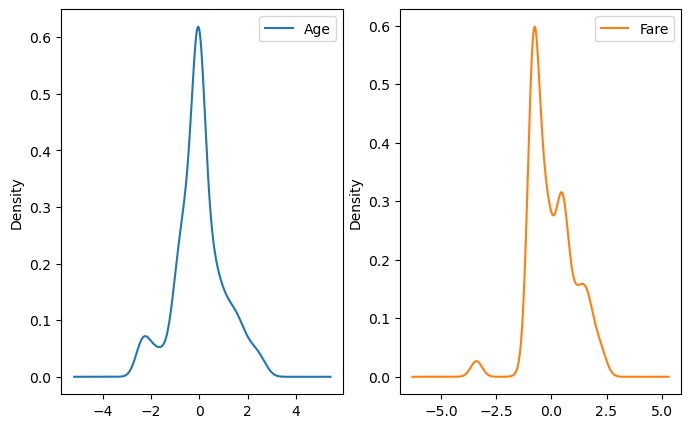

In [93]:
# Visually checking the distribution plots after skewness removal using powertransformer
x3.plot(kind='density',subplots=True,layout=(1,2),sharex=False,legend=True,fontsize=10,figsize=(8,5))
plt.show()

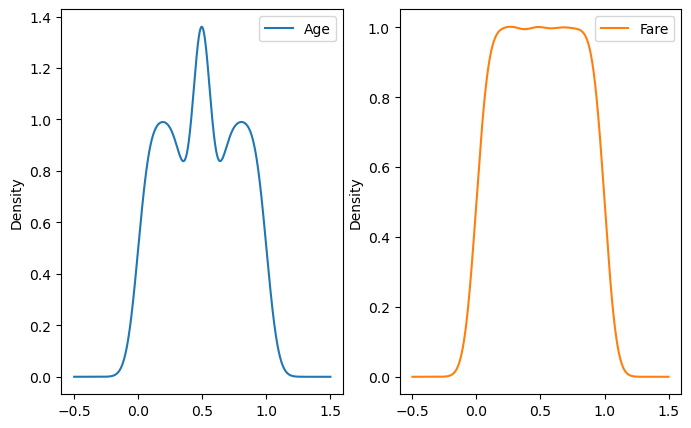

In [94]:
# Visually checking the distribution plots after skewness removal using quantile transformer
x5.plot(kind='density',subplots=True,layout=(1,2),sharex=False,legend=True,fontsize=10,figsize=(8,5))
plt.show()

Observations:
1. As the skewness is least using "quantile transformer", I am using transformed x data from "quantile transformer" for model building    

# Scaling data

In [95]:
# Applied standard scaler only on continuous data as we don't scale categorical data
# Here the standard scaler is applied eventhough skewness range is (-0.04,+0.04). This is done to get the normally distributed data
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x5_scaled=sc.fit_transform(x5)
x_continuous=pd.DataFrame(data=x5_scaled,columns=x_continous.columns)
x_continuous

,Age,Fare
0,-0.885938,-1.424053
1,1.053250,1.400716
2,-0.524737,-0.811018
3,0.887783,1.242448
4,0.887783,-0.682801
...,...,...
859,-0.454111,-0.109834
860,-1.146245,0.875830
861,-0.016229,0.445103
862,-0.524737,0.875830


In [96]:
# Getting x_categorical data
# Dropping columns "Age" and "Fare" from unscaled x to get categorical x data
x_cat=x.drop(["Age", "Fare"],axis=1)
x_cat

,Pclass,Parch,Name,Sex,Ticket,Cabin,Embarked
0,3,0,108.0,1.0,523.0,47.0,2.0
1,1,0,190.0,0.0,596.0,81.0,0.0
2,3,0,353.0,0.0,669.0,47.0,2.0
3,1,0,272.0,0.0,49.0,55.0,2.0
4,3,0,15.0,1.0,472.0,47.0,2.0
...,...,...,...,...,...,...,...
886,2,0,548.0,1.0,101.0,47.0,2.0
887,1,0,303.0,0.0,14.0,30.0,2.0
888,3,2,413.0,0.0,675.0,47.0,2.0
889,1,0,81.0,1.0,8.0,60.0,0.0


In [97]:
# Checking for the difference in index values between x continuous and x categorical data
(x_continuous.index.values==x_cat.index.values).all()

False

In [98]:
# As the indexing is different between x continuous and x categorical data, I will update x categorical index 
# same as x continuous as I need to combine both of them to get total x data

x_cat["index"]=x_continuous.index.values  # Adding a new column in "x_cat" with index values of "x_continuous"
x_categorical=x_cat.set_index("index") # Changing the index column in "x_cat" to get the same index values of "x_continuous" (scaled x data) 
x_categorical

,Pclass,Parch,Name,Sex,Ticket,Cabin,Embarked
index,,,,,,,
0,3,0,108.0,1.0,523.0,47.0,2.0
1,1,0,190.0,0.0,596.0,81.0,0.0
2,3,0,353.0,0.0,669.0,47.0,2.0
3,1,0,272.0,0.0,49.0,55.0,2.0
4,3,0,15.0,1.0,472.0,47.0,2.0
...,...,...,...,...,...,...,...
859,2,0,548.0,1.0,101.0,47.0,2.0
860,1,0,303.0,0.0,14.0,30.0,2.0
861,3,2,413.0,0.0,675.0,47.0,2.0


In [99]:
# Checking for the difference in index values between x continuous and x categorical data
(x_continuous.index.values==x_categorical.index.values).all()

True

Observations: Index values are same between x continuous and x categorical data hence I can combine them to get total x data

In [100]:
# Adding both categorical and continuous x features to get the total x data for model building
x=pd.concat([x_categorical,x_continuous],axis=1)
x

,Pclass,Parch,Name,Sex,Ticket,Cabin,Embarked,Age,Fare
0,3,0,108.0,1.0,523.0,47.0,2.0,-0.885938,-1.424053
1,1,0,190.0,0.0,596.0,81.0,0.0,1.053250,1.400716
2,3,0,353.0,0.0,669.0,47.0,2.0,-0.524737,-0.811018
3,1,0,272.0,0.0,49.0,55.0,2.0,0.887783,1.242448
4,3,0,15.0,1.0,472.0,47.0,2.0,0.887783,-0.682801
...,...,...,...,...,...,...,...,...,...
859,2,0,548.0,1.0,101.0,47.0,2.0,-0.454111,-0.109834
860,1,0,303.0,0.0,14.0,30.0,2.0,-1.146245,0.875830
861,3,2,413.0,0.0,675.0,47.0,2.0,-0.016229,0.445103
862,1,0,81.0,1.0,8.0,60.0,0.0,-0.524737,0.875830


In [101]:
x.isnull().sum()  # checking if any null values present in x to make sure "concat" operation is correct in the previous step

Pclass      0
Parch       0
Name        0
Sex         0
Ticket      0
Cabin       0
Embarked    0
Age         0
Fare        0
dtype: int64

In [102]:
x.shape

(864, 9)

In [103]:
y.shape

(864,)

In [104]:
# Checking for the difference in index values between x and y
(y.index.values==x.index.values).all()

False

In [105]:
# As the indexing is different between x and y data, I will update y index same as x

y_1=pd.DataFrame(data=y)  # Creating the dataframe with y data
# Updating y dataframe index same as x dataframe 
y_1["index"]=x.index.values  # Adding a new column in "y" with index values of "x"
y=y_1.set_index("index") # Changing the index column in "y" to get the same index values of "x" 

In [106]:
# Checking for the difference in index values between x and y
(y.index.values==x.index.values).all()

True

Observations: Index values are same between x and y hence I can use them for model building

In [107]:
x.shape

(864, 9)

In [108]:
y.shape

(864, 1)

# SMOTE for classfication

As the target variable classes are imbalanced, used the random oversampling technique "SMOTE" for balancing the classes in target variable

In [109]:
# Checking the value count of target column
y.value_counts()

Survived
0           537
1           327
dtype: int64

In [110]:
x.shape

(864, 9)

In [111]:
y.shape

(864, 1)

In [112]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [113]:
# Checking the value count of target column
y.value_counts()

Survived
0           537
1           537
dtype: int64

Observations: Classes are balanced in the target column

In [114]:
x.shape

(1074, 9)

In [115]:
y.shape

(1074, 1)

0    537
1    537
Name: Survived, dtype: int64


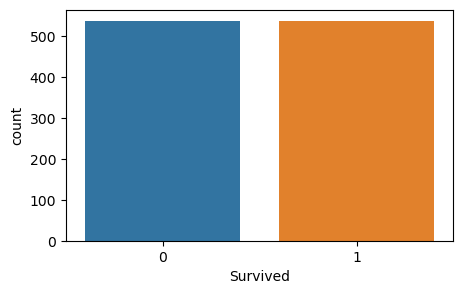

In [116]:
# Visualization of Target Variable
plt.figure(figsize=(5,3))
print(y["Survived"].value_counts())
sns.countplot(y["Survived"])
plt.show()

Observations: Classes are balanced in the target column

EDA part is completed and I will proceed with Model Building

# Model Building

In [117]:
# As target variable has two classes, I will use binary classification model and starts with LogisticRegression

In [118]:
# Defining the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

lr=LogisticRegression()  # Defining instance for logisticregression

# Finding the best random state value where training accuracy = testing accuracy

Random_State=[]
Training_Accuracy=[]
Testing_Accuracy=[]
Difference=[]

for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)

    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        Random_State.append(i)
        Training_Accuracy.append(accuracy_score(y_train,pred_train)*100)
        Testing_Accuracy.append(accuracy_score(y_test,pred_test)*100)
        Difference.append((accuracy_score(y_test,pred_test)*100)-(accuracy_score(y_train,pred_train)*100))

RS_table=pd.DataFrame({"Random State":Random_State,"Training Accuracy":Training_Accuracy,"Testing Accuracy":Testing_Accuracy,"Difference":Difference})
print("Table of random state values with training accuracy = testing accuracy")
RS_table.sort_values(by=["Difference"],ascending=True)

Table of random state values with training accuracy = testing accuracy


,Random State,Training Accuracy,Testing Accuracy,Difference
0,5,79.976717,80.000000,0.023283
6,530,79.976717,80.000000,0.023283
7,556,79.976717,80.000000,0.023283
9,815,79.976717,80.000000,0.023283
1,11,79.511059,79.534884,0.023824
2,45,79.511059,79.534884,0.023824
3,83,79.511059,79.534884,0.023824
4,307,79.511059,79.534884,0.023824
5,500,79.511059,79.534884,0.023824
8,678,79.511059,79.534884,0.023824


Observations: From the above table, as multple random states give same training and testing accuarcy scores, taking one of this  from the below code

In [119]:
# Getting the best random state where training accuracy equal to testing accuracy
RSN=RS_table["Random State"][RS_table["Difference"]==RS_table["Difference"].min()]
BRS=np.array(RSN)[0]
BRS

5

Observation: Considering random state=5 for the model building 

In [120]:
# Using the best random state and splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=BRS)

In [121]:
# Training the model and checking  accuracy score with the fixed random state
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print(accuracy_score(y_test,pred_test))

0.8


In [122]:
print(classification_report(y_test,pred_test))  # Printing classificatin report

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       112
           1       0.80      0.78      0.79       103

    accuracy                           0.80       215
   macro avg       0.80      0.80      0.80       215
weighted avg       0.80      0.80      0.80       215



In [123]:
print(confusion_matrix(y_test,pred_test))  # printing confusion matrix

[[92 20]
 [23 80]]


# Cross Validation for Logistic Regression

In [124]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection  import cross_val_score
lss=accuracy_score(y_test,pred_lr)

# Finding the optimized folds from Logistic Regression where the cross validation score is same as model score

No_of_Folds=[]
CV_Score=[]
Model_Score=[]
Difference=[]

for j in range(2,11):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    No_of_Folds.append(j)
    CV_Score.append(lsc*100)
    Model_Score.append(lss*100)
    Difference.append(abs(lsc-lss))
CV_table=pd.DataFrame({"No of Folds":No_of_Folds,"Cross Validation Score":CV_Score,"Model Score":Model_Score,"Difference":Difference})  
print("Cross Validation table")
CV_table.sort_values(by=["Difference"],ascending=True)

Cross Validation table


,No of Folds,Cross Validation Score,Model Score,Difference
3,5,79.332319,80.0,0.006677
0,2,79.329609,80.0,0.006704
8,10,79.246279,80.0,0.007537
5,7,79.242000,80.0,0.007580
6,8,79.148010,80.0,0.008520
7,9,79.059290,80.0,0.009407
1,3,79.050279,80.0,0.009497
2,4,78.963685,80.0,0.010363
4,6,78.864060,80.0,0.011359


Observations: Getting the no. folds where the delta is least between cross validation and model scores from the below code. In this case, selected CV=5 from the above table

In [125]:
# Getting the best no. of folds where the least difference between cross validation score and model score
CVF=CV_table["No of Folds"][CV_table["Difference"]==CV_table["Difference"].min()]
BCV=np.array(CVF)[0]
BCV

5

In [126]:
# Using best CV value and checking the cross validation score again to compare with model score
lsscore_selected=cross_val_score(lr,x,y,cv=BCV).mean()
print("The CV score is:",lsscore_selected*100,"\nThe accuracy score is:",lss*100)
print("Difference is:",lss-lsscore_selected)

The CV score is: 79.33231906107368 
The accuracy score is: 80.0
Difference is: 0.006676809389263294


# Other Classification Algorithms

In [127]:
from sklearn.naive_bayes import GaussianNB               # GaussianNB Algorithm
from sklearn.tree import DecisionTreeClassifier          # DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier       # KNeighborsClassifier
from sklearn.linear_model import SGDClassifier           # SGDClassifier
from sklearn.svm import SVC                              # SVC
from sklearn.ensemble import RandomForestClassifier      # RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier        # ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier  # GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier          # AdaBoostClassifier
from xgboost import XGBClassifier                        # XGBClassifier
from sklearn.ensemble import VotingClassifier            # VotingClassifier


# Defining Voting Classifier Models
estimator=[]
estimator.append(('KNC',KNeighborsClassifier()))
estimator.append(('SVC',SVC(gamma='auto',probability=True)))
estimator.append(('DTC',DecisionTreeClassifier()))

# Defining the list with all Algorithms

models=[('GaussianNB()',GaussianNB()),('Decision Tree Classifier()',DecisionTreeClassifier()),
        ('KNeighborsClassifier()',KNeighborsClassifier()),('SGDClassifier()',SGDClassifier()),
        ('SVC()',SVC()),('RandomForestClassifier()',RandomForestClassifier()),
        ('ExtraTreesClassifier()',ExtraTreesClassifier()),('GradientBoostingClassifier()',GradientBoostingClassifier()),
        ('AdaBoostClassifier()',AdaBoostClassifier()),('XGBClassifier()',XGBClassifier()),
        ('VotingClassifier()',VotingClassifier(estimators=estimator,voting="soft"))]

# Defining empty lists
Model=[lr]
CV_Score=[lsscore_selected*100]
Model_Score=[lss*100]
Difference=[lss-lsscore_selected]

# Loop for all algorithms to train the model and for the cross validation
for model in models:
    model[1].fit(x_train,y_train)                             # Train the model
    pred_test=model[1].predict(x_test)                        # Predict Y values from the model using X test
    Model_Score.append(accuracy_score(y_test,pred_test)*100)  # Appending "Accuracy score" to the list
    print("Model:",model[0])
    print("Accuracy Score:")
    print(accuracy_score(y_test,pred_test)*100)               # Printing "accuracy_score"
    print("Confusion Matrix:")
    print(confusion_matrix(y_test,pred_test))                 # Printing "confusion_matrix"
    print("Classification Report:")
    print(classification_report(y_test,pred_test))            # Printing "classification_report"
    print('-'*60)
    
    
    score=cross_val_score(model[1],x,y,cv=BCV).mean()         # Cross Validation mean score calculation
    CV_Score.append(score*100)                                # Appending "cross validation score" to the list
    Difference.append(abs(accuracy_score(y_test,pred_test)-score)) # Appending "Difference b/w CV and model scores" to the list
    Model.append(model[0])                                    # Appending "Model" to the list

# Creating the dataframe with scores and the differences
score_table=pd.DataFrame({'Model':Model,'Model Score':Model_Score,'Cross Validation Score':CV_Score,'Difference':Difference})
print("Table with performance of the models")
score_table.sort_values(by=["Difference"],ascending=True)  # sorting the score table using the difference

Model: GaussianNB()
Accuracy Score:
77.20930232558139
Confusion Matrix:
[[88 24]
 [25 78]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       112
           1       0.76      0.76      0.76       103

    accuracy                           0.77       215
   macro avg       0.77      0.77      0.77       215
weighted avg       0.77      0.77      0.77       215

------------------------------------------------------------
Model: Decision Tree Classifier()
Accuracy Score:
79.06976744186046
Confusion Matrix:
[[83 29]
 [16 87]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.74      0.79       112
           1       0.75      0.84      0.79       103

    accuracy                           0.79       215
   macro avg       0.79      0.79      0.79       215
weighted avg       0.80      0.79      0.79       215

-------------------------------------------

,Model,Model Score,Cross Validation Score,Difference
8,GradientBoostingClassifier(),84.651163,85.105847,0.004547
9,AdaBoostClassifier(),82.790698,82.315149,0.004755
7,ExtraTreesClassifier(),85.581395,86.132580,0.005512
11,VotingClassifier(),82.790698,82.127798,0.006629
0,LogisticRegression(),80.000000,79.332319,0.006677
1,GaussianNB(),77.209302,76.447729,0.007616
10,XGBClassifier(),84.651163,85.571832,0.009207
4,SGDClassifier(),56.744186,55.214084,0.015301
5,SVC(),60.930233,62.844599,0.019144
2,Decision Tree Classifier(),79.069767,81.290589,0.022208


In [128]:
# Getting the best model where the least difference between cross validation score and model score
BMS=score_table["Model"][score_table["Difference"]==score_table["Difference"].min()]
BM=np.array(BMS)[0]
BM  # Best Model

'GradientBoostingClassifier()'

Observations: Based on the comparison between model score and cross validation scores for multiple models, I have considered "GradientBoostingClassifier()" is the best model as the difference is least among all the models. Hyper parameter tuning will be pefromed for "GradientBoostingClassifier()".

# Hyper Parameter Tuning

In [129]:
# Hyper parameter tuning on GradientBoostingClassifier()

from sklearn.model_selection import GridSearchCV

# Defining parameters for GradientBoostingClassifier()
parameters = {
    "loss":["log_loss", "deviance", "exponential"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2,0.3],
    "max_depth":[2,3,4,5,7],
    "max_features":["auto", "sqrt", "log2"],
    "criterion": ["friedman_mse", "squared_error"],
    "subsample":[0.1, 0.2, 0.5, 1.0],
    "n_estimators":[50,100,200,300]
    }

In [130]:
GCV=GridSearchCV(GradientBoostingClassifier(),parameters,cv=10,n_jobs=-1)  # Defining instance for GridSearchCV

In [131]:
GCV.fit(x_train,y_train)   # Apply GridSearchCV to train the model with all combination of parameters

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15,
                                           0.2, 0.3],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'max_depth': [2, 3, 4, 5, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 300],
                         'subsample': [0.1, 0.2, 0.5, 1.0]})

In [133]:
GCV.best_params_   # printing the best parameters

{'criterion': 'friedman_mse',
 'learning_rate': 0.3,
 'loss': 'exponential',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 200,
 'subsample': 0.5}

In [134]:
# Training the model using best parameters from GridSearchCV and checking the accuracy score, classificaiton report and confusion matrix
ht_model=GradientBoostingClassifier(loss=GCV.best_params_['loss'],learning_rate=GCV.best_params_['learning_rate'],
                                 max_depth=GCV.best_params_['max_depth'],max_features=GCV.best_params_['max_features'],
                                 criterion=GCV.best_params_['criterion'],subsample=GCV.best_params_['subsample'],
                                 n_estimators=GCV.best_params_['n_estimators'])
ht_model.fit(x_train,y_train)
pred=ht_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

86.51162790697674
[[95 17]
 [12 91]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       112
           1       0.84      0.88      0.86       103

    accuracy                           0.87       215
   macro avg       0.87      0.87      0.87       215
weighted avg       0.87      0.87      0.87       215



In [135]:
score=cross_val_score(ht_model,x,y,cv=BCV).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(y_test,pred)*100)
print("Difference is:",accuracy_score(y_test,pred)-score)

The CV score is: 87.06150836774616 
The accuracy score is: 86.51162790697674
Difference is: -0.005498804607694141


Observations for Gradient Boost Classifier: 
1. Hyper Parameter Tuned model: The difference between Cross Validation Score and model score is   0.005549
2. Model with default parameters: The difference between Cross Validation Score and model score is 0.004547
3. As the delta is least in the model with default parameters, considering the model with default parameters as the best model for saving

# AUC ROC Curve

AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings.

ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.

Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1

Plotting AUC ROC Curve helps in comparing the performance among multiple models. The model with higher AUC is the best model.

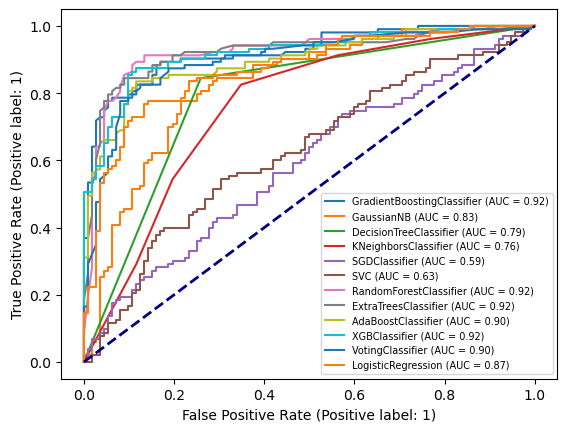

In [139]:
# Checking AUC ROC Curve to compare the multiple models

# from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

# models=[('GaussianNB()',GaussianNB()),('Decision Tree Classifier()',DecisionTreeClassifier()),
#        ('KNeighborsClassifier()',KNeighborsClassifier()),('SGDClassifier()',SGDClassifier()),
#        ('SVC()',SVC()),('RandomForestClassifier()',RandomForestClassifier()),
#        ('ExtraTreesClassifier()',ExtraTreesClassifier()),('GradientBoostingClassifier()',GradientBoostingClassifier()),
#        ('AdaBoostClassifier()',AdaBoostClassifier()),('XGBClassifier()',XGBClassifier()),
#        ('VotingClassifier()',VotingClassifier(estimators=estimator,voting="soft"))]

# Initially Plotting the AUC ROC curve for GradientBoostingClassifier
disp=plot_roc_curve(models[7][1],x_test,y_test)  

# Basically plot_roc_curve function plot the roc_curve for the classifier. Here we store the first gragh in the variable "disp"
# and access its axis and provide to the next plot_roc_curve function, so that the plot appear of the axes of the first graph only
# If we dont specify "ax", it will plot multiple graphs

# Plotting the AUC ROC curve for remaining models with same axis of GradientBoostingClassifier
plot_roc_curve(models[0][1],x_test,y_test,ax=disp.ax_) 

plot_roc_curve(models[1][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[2][1],x_test,y_test,ax=disp.ax_)

plot_roc_curve(models[3][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[4][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[5][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[6][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[8][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[9][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[10][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)

plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')

plt.legend(prop={'size':7},loc='lower right')
plt.show()

Observations:
1. Many models are performing well. 
2. GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier and XGBClassifier are the best one among all models from this plot. 
3. GradientBoostingClassifier is also the best based on the accuracy score and the least difference between model accuracy score & cross validation score. Hence saving GradientBoostingClassifier as the final model for deployment

# Model Saving

In [140]:
import pickle
filename='titanic.pkl'
pickle.dump(models[7][1], open(filename,'wb'))  # saving the Gradient Boost Classifier model

# Conclusion

In [154]:
loaded_model=pickle.load(open('titanic.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

conclusion=pd.DataFrame([loaded_model.predict(x_test),y_test.squeeze()],index=["Predicted","Original"])
conclusion.T

84.65116279069768


,Predicted,Original
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
210,1,0
211,0,0
212,0,0
213,0,0
